# Hex World 

Algorithms:
- Lookahead (loopy)
- Lookahead (transmission matrix)
- System of equations 

# Exact Solution Methods to Sequential Problems using HexWorld Problem from ADM

In [1]:
from typing import Tuple, List
from hex_world import HexWorld, HexMove, Hexagon
import numpy as np

GRID = [
    [ "0","0","0", "0","0","0","0", "0","0","0",],
    ["5","0","0", "X","0","0","X","X","0","0",],
    ["0","0","-10", "0","X", "0","0","0", "X","10"],
]

EAST_POLICY = [[HexMove.EAST for _ in range(10)] for _ in range(3)]


hw = HexWorld(grid=GRID, policy=EAST_POLICY)

gamma = 1

def lookahead(state: Hexagon, depth=0):
    if depth>10:
        return 0
    action = state.policy
    R = state.score
    if R == -1:
        raise Exception('shouldnt be able to move to hole')
    if R != 0:
        return R
    
    lottery = state.reachable_states(action)

    rollout = 0
    for prob, next_state in lottery:
        if next_state == None:
            rollout += -1 * prob
            rollout += prob * lookahead(state, depth+1)
        else:
            rollout += (prob * lookahead(next_state, depth+1))
    
    return gamma * rollout

        
U_oo_lookahead = []
for i in range(3):
    for j in range(10):
        hexagon = hw.hexagons[i][j]
        if hexagon.score != -1:
            U_oo_lookahead.append(lookahead(hexagon))
U_oo_lookahead = np.array(U_oo_lookahead)
U_oo_lookahead.shape

(25,)

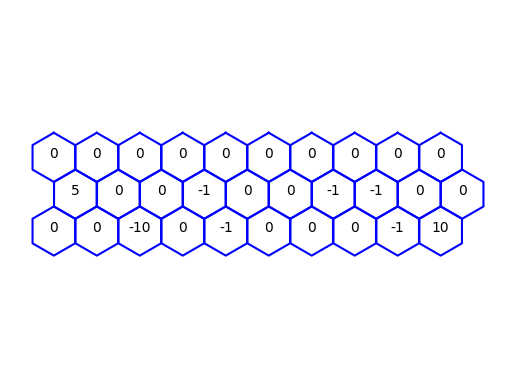

In [2]:
hw.plt_graph()

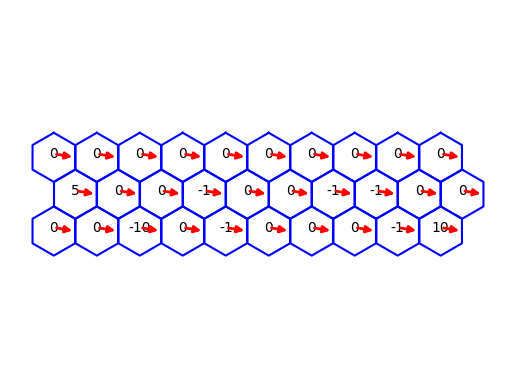

In [3]:
hw.plt_graph(show_score=True, show_policy=True)

In [4]:
import numpy as np
T, R = hw.get_mdp()

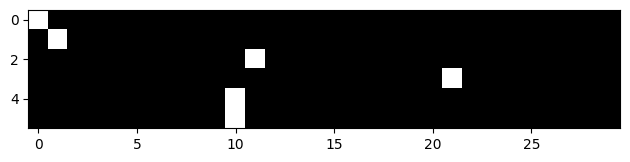

In [5]:
from skimage import io 
io.imshow(T[10])

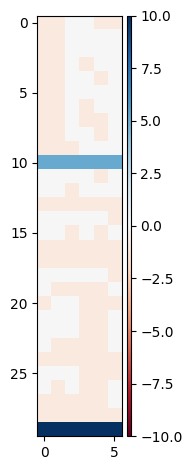

In [6]:
io.imshow(R)

# Reimplement lookahead with transition matrix 

In [7]:
from hex_world import HexMove

policy = HexMove.EAST.value

def lookahead(s: int, depth=0):
    if depth>10:
        return 0 
    reward = R[s, policy]
    if reward != 0:
        return reward
    for next_state_index, next_state_prob in enumerate(T[s, policy]):
        if next_state_prob > 0:
            if next_state_index == s:
                reward += next_state_prob * -1
            reward += next_state_prob * lookahead(next_state_index, depth+1)
    return gamma * reward
        
        
    lookahead
U_lookahead = np.array([(i) for i in range(30)])
    
    
    

# Alternatively solved by solving system of equations 

In [8]:
T_policy = T[:, policy, :]
# T_policy = np.sum(T, axis=1) 
# denom = np.sum(T_policy, axis=1) 
# T_policy = np.divide(T_policy,denom, out=np.zeros_like(T_policy), where=denom!=0)
np.sum(T_policy, axis=-1)
#io.imshow(T_policy)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 0.,
       0., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 0., 1.])

In [9]:
mask = np.sum(T_policy, axis=-1) == 1
T_policy_cleaned = T_policy[mask][:, mask]
T_policy_cleaned



array([[0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 

In [10]:
U_linear_eq = np.linalg.inv(np.eye(T_policy_cleaned.shape[0]) - T_policy_cleaned) #@ R[:,policy][...,np.newaxis]
U_linear_eq[:,0]

LinAlgError: Singular matrix

In [11]:
U_lookahead

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29])

In [12]:
U_oo_lookahead

array([ -2,  -3,  -4,  -5,  -6,  -7,  -8,  -9, -10, -11,   5, -10, -11,
       -10, -11, -10, -11, -10, -10, -10, -11,  -9, -10, -11,  10])

In [13]:
T_policy[:,-1]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.])

In [14]:
(0.15 * -1) + \
(0.15 * 0.15 * -1) + \
(0.7 * 0.15 * -1) + \
(0.7 * 0.15 * -1) + \
(0.15 * 0.7 * 1) 

-0.27749999999999997

In [20]:
T[20,2,:]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.])